# Projeto Ciencia dos Dados
## Cluesterização de filmes recomendados

#### Vitor Satyro, Iago Mendes, Gabriel Ligeiro


- Hieraquica Cluster   http://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

- Kmean Cluster https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

- Kmean Cluster2 https://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering

- Todos os tipos de Clusters http://scikit-learn.org/stable/modules/clustering.html

- Livro postado pelo Miranda: Kmeans - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [8]:
import pandas as pd
from scipy import stats
from math import *
import numpy as np
from sklearn.cluster import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('Dataset/movies_metadata.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#Pegar colunas especificas
colunas = ["popularity","runtime","vote_average","vote_count"]
df_ = df[colunas]

In [11]:
#Escolher 4000 colunas aleatorias para um novo dataset
n = 4000
df2 = df_.loc[np.random.choice(df_.index,size=n),:]

df3 = df2.dropna()


In [12]:
for c in colunas:
    df3.loc[:,c] = pd.to_numeric(df3.loc[:,c])
    


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
#Cluster the data
std = stats.zscore(df3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(std)
labels = kmeans.labels_

#Glue back to originaal data
df3['clusters'] = labels

#Add the column into our list
colunas.extend(['clusters'])
df4 = df3[colunas]

#Lets analyze the clusters
print (df4.groupby('clusters').mean())

          popularity     runtime  vote_average  vote_count
clusters                                                  
0           1.612068   90.147160      5.530379   20.143144
1          11.089957  117.189516      6.498790  710.737903


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


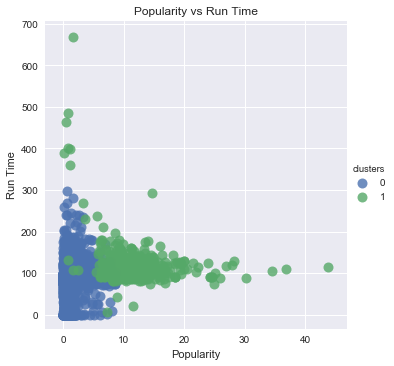

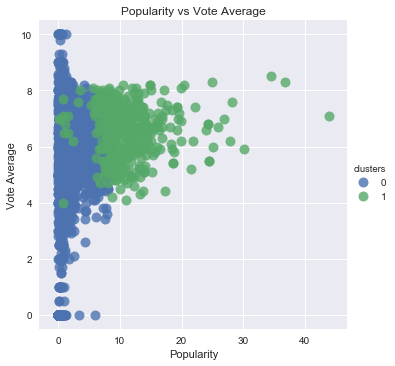

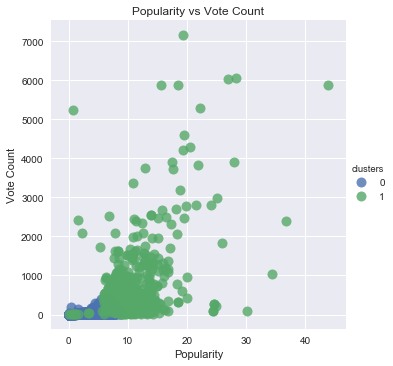

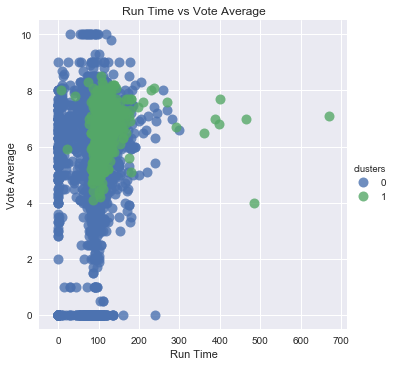

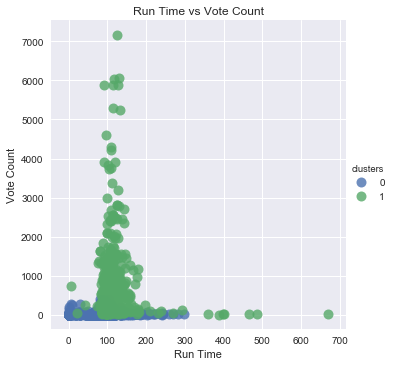

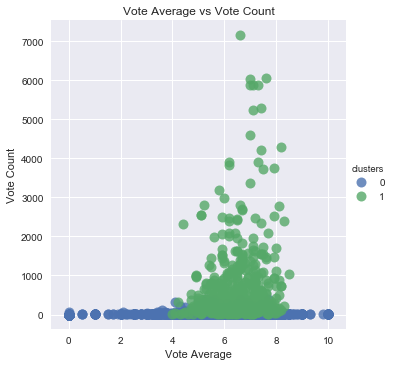

In [15]:
#Plotting popularity / runtime
sns.lmplot('popularity', 'runtime', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Run Time')
plt.xlabel('Popularity')
plt.ylabel('Run Time')

#Plotting popularity / vote_average
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sns.lmplot('popularity', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')

#Plotting popularity / vote_count
sns.lmplot('popularity', 'vote_count', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')

#Plotting runtime / vote_average
sns.lmplot('runtime', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Run Time vs Vote Average')
plt.xlabel('Run Time')
plt.ylabel('Vote Average')

#Plotting runtime / vote_count
sns.lmplot('runtime', 'vote_count', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Run Time vs Vote Count')
plt.xlabel('Run Time')
plt.ylabel('Vote Count')

#Plotting vote_average / vote_count
sns.lmplot('vote_average', 'vote_count', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')